## K-Means-Clustering Machine-Learning

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset('titanic')

df['age'].fillna(df['age'].mean() , inplace=True)

df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [26]:
from sklearn.cluster import KMeans

X = df[['age' , 'fare']]


from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

X_scaled = scale.fit_transform(X)

model = KMeans(n_clusters=5)

model.fit(X_scaled)


df['cluster'] = model.labels_



c:\Users\N'S SMART\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
X_scaled

array([[-0.5924806 , -0.50244517],
       [ 0.63878901,  0.78684529],
       [-0.2846632 , -0.48885426],
       ...,
       [ 0.        , -0.17626324],
       [-0.2846632 , -0.04438104],
       [ 0.17706291, -0.49237783]])

In [17]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,cluster
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,2
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0


In [27]:
df.cluster.unique()

array([3, 2, 1, 0, 4])

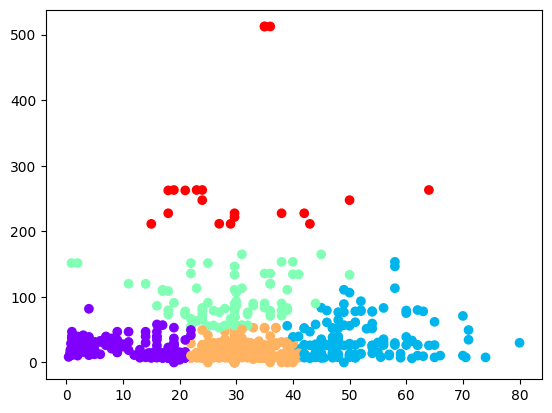

In [29]:
plt.scatter(df['age'] , df['fare'] , c=df['cluster'] , cmap='rainbow')

plt.show()

In [31]:
import plotly.express as px

fig = px.scatter(df , x='age' , y='fare' , color='cluster')

fig.show()

     ---------------------------------------- 15.2/15.2 MB 2.2 MB/s eta 0:00:00

[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import plotly.express as px

fig = px.scatter_3d(df , x='age' , y='fare' , z='pclass' , color='cluster')

fig.show()

In [35]:
fig = px.parallel_coordinates(df , color='cluster' , title='Titanic DataSet OverFlow')

fig.show()